**Trabajo Práctico III**

---
Tecnicatura Universitaria en Inteligencia Artificial

Materia: Minería de Datos

Fecha de entrega: 17-06

Estudiantes:

*   Domingo, Francisco
*   Valeri, Lara Rita

Año de cursada: 1° cuatrimestre 2024

Docentes:
* Flavio E. Spetale
* Facundo Vasquez

# Importamos las librerias

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import precision_score, recall_score

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,  confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report
from imblearn.over_sampling import SMOTE

In [30]:
# Para ignorar los Warnings
warnings.filterwarnings('ignore')

# 1) Análisis de los datos

## Descarga del data set

In [31]:
# Generación de dataframe a partir del CSV
df = pd.read_csv('CoffeeRatings.csv', delimiter=';')

# Visualización de las primeras 5 filas para conocer la estructura de los datos
print(df.head())

   Scores_Aroma  Scores_Flavor  Scores_Aftertaste  Scores_Acidity  \
0            85             85                 80              80   
1            85            817                 80             775   
2           833             80                 80              80   
3            80             80                 80             767   
4            80            792                775             775   

   Scores_Body  Scores_Balance  Scores_Uniformity  Scores_Sweetness  \
0           80              80                100               100   
1           80              80                100               100   
2          775              80                100               100   
3          775              80                100               100   
4           80             775                100               100   

   Scores_Moisture  Scores_Total       Color  
0               12          8692       Green  
1               12          8642       Green  
2               1

In [32]:
# Se nos solicito eliminar la columna Scores_Total

df = df.drop('Scores_Total', axis=1)
print(df.head())

   Scores_Aroma  Scores_Flavor  Scores_Aftertaste  Scores_Acidity  \
0            85             85                 80              80   
1            85            817                 80             775   
2           833             80                 80              80   
3            80             80                 80             767   
4            80            792                775             775   

   Scores_Body  Scores_Balance  Scores_Uniformity  Scores_Sweetness  \
0           80              80                100               100   
1           80              80                100               100   
2          775              80                100               100   
3          775              80                100               100   
4           80             775                100               100   

   Scores_Moisture       Color  
0               12       Green  
1               12       Green  
2               11  Blue-Green  
3               11  Blue-G

## Análisis de los datos

In [33]:
# Veamos si tenemos datos nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Color              835 non-null    object
dtypes: int64(9), object(1)
memory usage: 65.4+ KB
None


Podemos observar que no tenemos datos nulos y que los datos pueden ser enteros y objetos. Analizamos un poco más el tipo de datos, unidad de medida y que representan en el contexto del dataset.

In [34]:
# A continuación obtenemos una tabla que describe nuestros datos: media, desvío, cuartiles, valores máximos y minimos para cada columna.
df.describe()
#Eso se realiza solo para las variables numéricas, es decir no se eincluye color

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000
max,875.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000


In [35]:
df.columns

Index(['Scores_Aroma', 'Scores_Flavor', 'Scores_Aftertaste', 'Scores_Acidity',
       'Scores_Body', 'Scores_Balance', 'Scores_Uniformity',
       'Scores_Sweetness', 'Scores_Moisture', 'Color'],
      dtype='object')

- Scores_Aroma: Puntaje dado al aroma del café. El aroma se refiere al olor del café, que puede incluir notas florales, afrutadas, especiadas, etc.

- Scores_Flavor: Puntaje dado al sabor del café. Esto incluye el perfil de sabor completo del café, incluyendo la riqueza, complejidad y la combinación de diferentes sabores.

- Scores_Aftertaste: Puntaje dado al retrogusto del café. El aftertaste se refiere a los sabores que persisten en la boca después de tragar el café.

- Scores_Acidity: Puntaje dado a la acidez del café. La acidez en el café no se refiere al nivel de pH, sino a una calidad brillante y viva en el sabor, similar a la sensación que se obtiene de los cítricos.

- Scores_Body: Puntaje dado al cuerpo del café. El cuerpo se refiere a la sensación en la boca del café, como la viscosidad y la riqueza. Puede ser ligero, medio o completo.

- Scores_Balance: Puntaje dado al equilibrio del café. Esto se refiere a cómo se integran y complementan los diferentes atributos del café (acidez, sabor, cuerpo, etc.).

- Scores_Uniformity: Puntaje dado a la uniformidad del café. Esto evalúa la consistencia de las características del café a través de diferentes muestras o preparaciones.

- Scores_Sweetness: Puntaje dado a la dulzura del café. Esto se refiere a la presencia de sabores dulces naturales en el café, sin añadir azúcar.

- Scores_Moisture: Puntaje dado al contenido de humedad del café. Esto mide la cantidad de agua presente en los granos de café, que puede afectar la calidad y el almacenamiento del café.

- Color: Representa el color del café, que puede referirse al color de los granos tostados o al color del café preparado. 

In [36]:
color = df['Color'].unique()
color

array(['Green', 'Blue-Green', 'Bluish-Green'], dtype=object)

In [37]:
# Vamos a codificar esta columna
le = LabelEncoder()
df['Color'] = le.fit_transform(df['Color'])
# Veamos el resultado
colores_enc = df['Color'].unique()
print("Códigos para identificar a los colores: ")
print('Color', '      Código')
for cu, co in zip(color, colores_enc):
    print('{:<13} {:<10}'.format(cu, co))

Códigos para identificar a los colores: 
Color       Código
Green         2         
Blue-Green    0         
Bluish-Green  1         


In [38]:
conteo_colores = df['Color'].value_counts()
print(conteo_colores)


Color
2    681
1     96
0     58
Name: count, dtype: int64


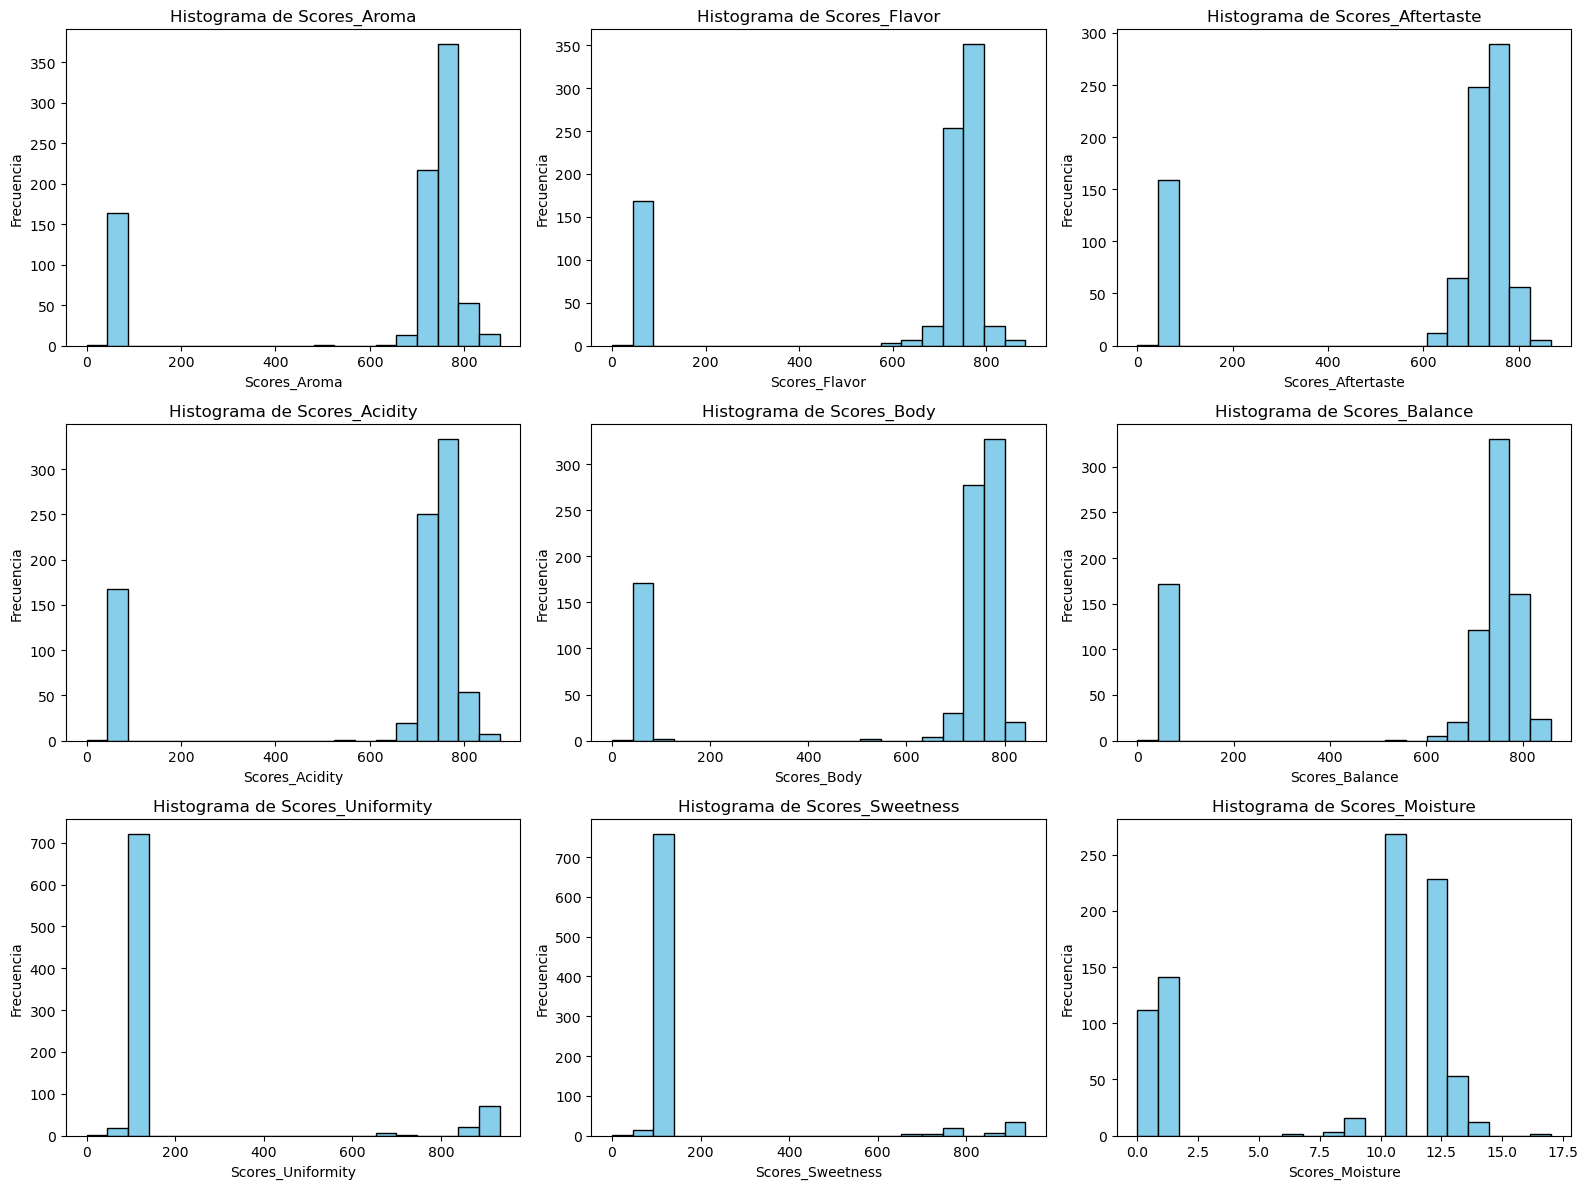

In [39]:
# Listamos las variables numéricas del DataFrame
variables_numericas = ['Scores_Aroma', 'Scores_Flavor', 'Scores_Aftertaste', 'Scores_Acidity',
                       'Scores_Body', 'Scores_Balance', 'Scores_Uniformity',
                       'Scores_Sweetness', 'Scores_Moisture']

# Creamos un grid de subplots
fig, axs = plt.subplots(3, 3, figsize=(16, 12))

for i, variable in enumerate(variables_numericas):
    fila = i // 3
    columna = i % 3
    axs[fila, columna].hist(df[variable], bins=20, color='skyblue', edgecolor='black')
    axs[fila, columna].set_xlabel(variable)
    axs[fila, columna].set_ylabel('Frecuencia')
    axs[fila, columna].set_title('Histograma de ' + variable)

plt.tight_layout()
plt.show()

La mayoría de las características sensoriales del café (aroma, sabor, retrogusto, acidez, cuerpo y equilibrio) tienen puntuaciones altas predominantes (entre 700 y 800 aproximadamente), lo que sugiere que las muestras de café evaluadas son de alta calidad en estos aspectos.

Las puntuaciones de uniformidad y dulzura muestran una gran variabilidad, con muchas muestras teniendo puntuaciones muy bajas, lo que podría indicar inconsistencia en estos atributos o una evaluación más estricta.

La humedad del café parece estar más concentrada en un rango específico (10-12.5).

## Outliers

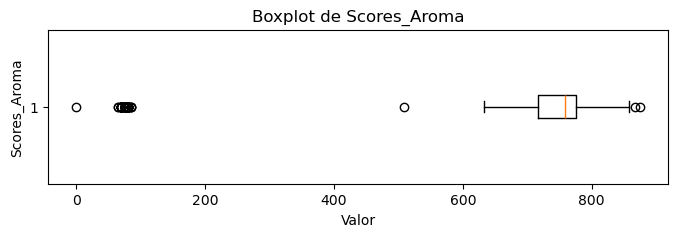

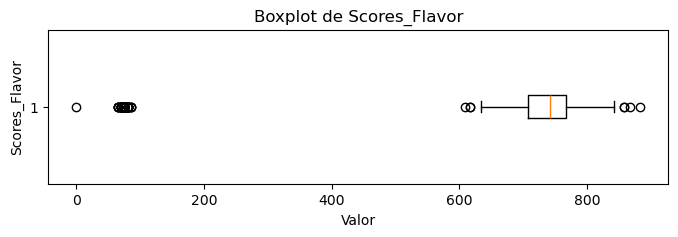

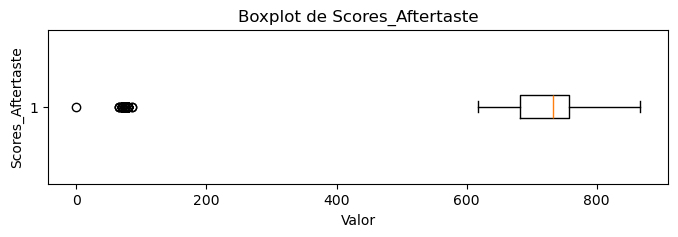

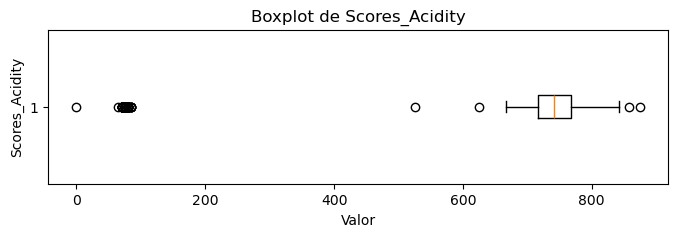

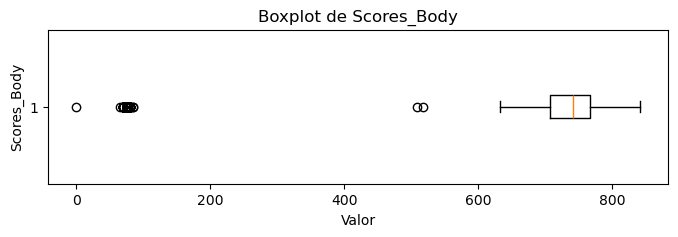

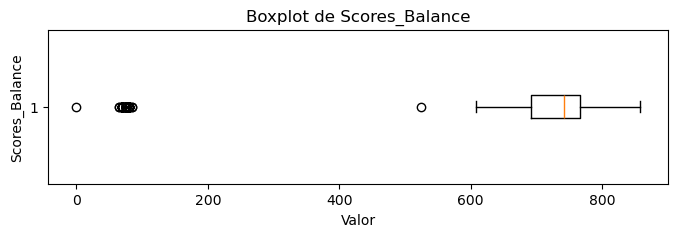

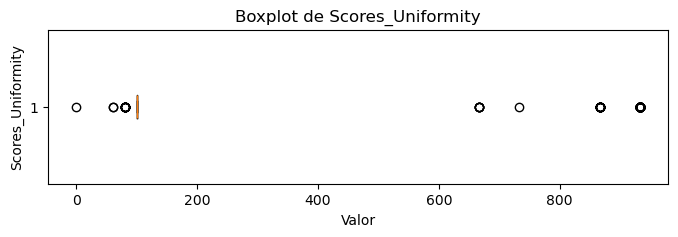

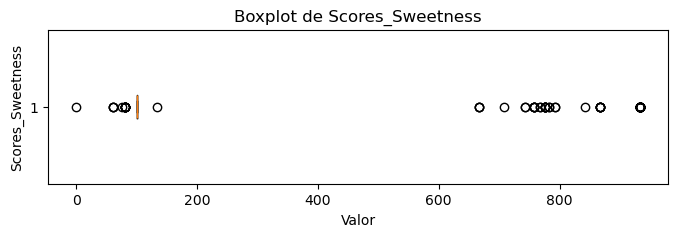

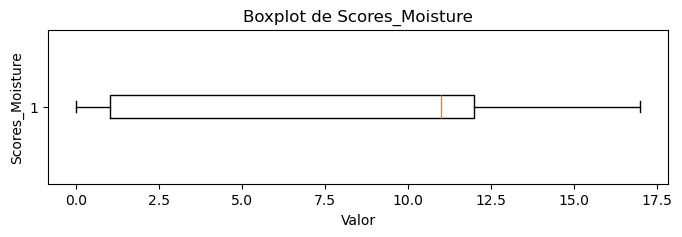

In [40]:
for variable in variables_numericas:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[variable], vert=False)
    plt.xlabel('Valor')
    plt.ylabel(variable)
    plt.title('Boxplot de ' + variable)
    plt.show()

Analizaremos cantidad de valores atípicos y el porcentaje que representa, vamos a excluir la variable Scores_Moisture ya que a partir del Boxplot podemos observar que no contiene valores atípicos.

In [41]:
def count_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    outliers = group[(group < lower_bound) | (group > upper_bound)]
    count = outliers.count()
    percentage = 100 * count / group.count()
    return count, percentage

columns_to_check = ['Scores_Aroma', 'Scores_Flavor', 'Scores_Aftertaste', 
                    'Scores_Acidity', 'Scores_Body', 'Scores_Balance', 
                    'Scores_Uniformity', 'Scores_Sweetness']

outliers_info = {}

for col in columns_to_check:
    outliers_count, outliers_percentage = count_outliers(df[col])
    outliers_info[col] = {'count': outliers_count, 'percentage': outliers_percentage}

# Imprimir resultados
for col, info in outliers_info.items():
    print(f"Cantidad de valores atípicos en '{col}': {info['count']}")
    print(f"Porcentaje de valores atípicos en '{col}': {info['percentage']:.2f}%")


Cantidad de valores atípicos en 'Scores_Aroma': 166
Porcentaje de valores atípicos en 'Scores_Aroma': 19.88%
Cantidad de valores atípicos en 'Scores_Flavor': 169
Porcentaje de valores atípicos en 'Scores_Flavor': 20.24%
Cantidad de valores atípicos en 'Scores_Aftertaste': 160
Porcentaje de valores atípicos en 'Scores_Aftertaste': 19.16%
Cantidad de valores atípicos en 'Scores_Acidity': 171
Porcentaje de valores atípicos en 'Scores_Acidity': 20.48%
Cantidad de valores atípicos en 'Scores_Body': 176
Porcentaje de valores atípicos en 'Scores_Body': 21.08%
Cantidad de valores atípicos en 'Scores_Balance': 174
Porcentaje de valores atípicos en 'Scores_Balance': 20.84%
Cantidad de valores atípicos en 'Scores_Uniformity': 115
Porcentaje de valores atípicos en 'Scores_Uniformity': 13.77%
Cantidad de valores atípicos en 'Scores_Sweetness': 79
Porcentaje de valores atípicos en 'Scores_Sweetness': 9.46%


Podemos observar que todas las variables tiene valores atípicos, entre el 10 y el 20. Realizaremos un tratamiento para estos casos

In [42]:
# Reemplazar valores atípicos por la mediana
def replace_outliers_with_median(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    
    # Reemplazar los valores atípicos por la mediana
    group = group.mask((group < lower_bound) | (group > upper_bound), group.median())
    return group

# Reemplazar valores atípicos para cada columna
for col in columns_to_check:
    df[col] = replace_outliers_with_median(df[col])

# Recalcular los valores atípicos después de reemplazarlos
outliers_info = {}
for col in columns_to_check:
    outliers_count, outliers_percentage = count_outliers(df[col])
    outliers_info[col] = {'count': outliers_count, 'percentage': outliers_percentage}

# Imprimir resultados después de reemplazar valores atípicos por la mediana
for col, info in outliers_info.items():
    print(f"Cantidad de valores atípicos en '{col}': {info['count']}")
    print(f"Porcentaje de valores atípicos en '{col}': {info['percentage']:.2f}%")


Cantidad de valores atípicos en 'Scores_Aroma': 13
Porcentaje de valores atípicos en 'Scores_Aroma': 1.56%
Cantidad de valores atípicos en 'Scores_Flavor': 31
Porcentaje de valores atípicos en 'Scores_Flavor': 3.71%
Cantidad de valores atípicos en 'Scores_Aftertaste': 21
Porcentaje de valores atípicos en 'Scores_Aftertaste': 2.51%
Cantidad de valores atípicos en 'Scores_Acidity': 22
Porcentaje de valores atípicos en 'Scores_Acidity': 2.63%
Cantidad de valores atípicos en 'Scores_Body': 4
Porcentaje de valores atípicos en 'Scores_Body': 0.48%
Cantidad de valores atípicos en 'Scores_Balance': 42
Porcentaje de valores atípicos en 'Scores_Balance': 5.03%
Cantidad de valores atípicos en 'Scores_Uniformity': 0
Porcentaje de valores atípicos en 'Scores_Uniformity': 0.00%
Cantidad de valores atípicos en 'Scores_Sweetness': 0
Porcentaje de valores atípicos en 'Scores_Sweetness': 0.00%


Completamos los valores atipicos con la mediana y logramos reducir significativamente los mismos.
Como el porcentaje es pequeño decidimos dejar los valores atipicos obtenidos.

## Estandarización

Para la estandarización no incluimos la columna Colors, ya que no es una variable continua

In [43]:
variables_numericas

['Scores_Aroma',
 'Scores_Flavor',
 'Scores_Aftertaste',
 'Scores_Acidity',
 'Scores_Body',
 'Scores_Balance',
 'Scores_Uniformity',
 'Scores_Sweetness',
 'Scores_Moisture']

Para realizar la estandarización elegimos Max-Min ya que las variables no parecen tener una distribución normal por loq ue pudimos observar en los hsitogramas de cada una de ellas.

In [44]:
min_max_scaler = MinMaxScaler()
df[variables_numericas] = min_max_scaler.fit_transform(df[variables_numericas])

print(df.head().round(4))

   Scores_Aroma  Scores_Flavor  Scores_Aftertaste  Scores_Acidity  \
0        0.5165         0.4873              0.464          0.5021   
1        0.5165         0.7600              0.464          0.6438   
2        0.8264         0.4873              0.464          0.5021   
3        0.5165         0.4873              0.464          0.6094   
4        0.5165         0.6691              0.632          0.6438   

   Scores_Body  Scores_Balance  Scores_Uniformity  Scores_Sweetness  \
0       0.5215           0.536                0.0               0.0   
1       0.5215           0.536                0.0               0.0   
2       0.6794           0.536                0.0               0.0   
3       0.6794           0.536                0.0               0.0   
4       0.5215           0.668                0.0               0.0   

   Scores_Moisture  Color  
0           0.7059      2  
1           0.7059      2  
2           0.6471      0  
3           0.6471      0  
4           0.6471

In [45]:
df['Color'].unique()

array([2, 0, 1])

In [46]:
# Dividimos los datos en train y test
X = df.drop(columns = 'Color')
y = df['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y,
    train_size = 0.8, random_state = 42, shuffle = True)

# 2) SVM con kernel lieal

Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel lineal analizando el parámetro costo. Mostar los resultados sobre los conjuntos de test
(Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5.

In [47]:
modelo = SVC(C = 100, kernel = 'linear', random_state=42)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=42)

In [48]:
y_pred = modelo.predict(X_test)

# Calculamos precisión, exhaustividad y exactitud
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión: {precision:.2f}")
print(f"Exhaustividad: {recall:.2f}")
print(f"Exactitud: {accuracy:.2f}")

Precisión: 0.65
Exhaustividad: 0.81
Exactitud: 0.81


In [49]:
C_values = [1, 10, 100, 1000, 5000]
cv_results = {}

# Validación cruzada para cada valor de C
for C in C_values:
    modelo = SVC(C=C, kernel='linear', random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
    cv_results[C] = scores.mean()
    print(f"C: {C}, Exactitud: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# Seleccionamos el mejor modelo según la validación cruzada
best_C = max(cv_results, key=cv_results.get)
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print(f"Mejor valor de C: {best_C}")

# Entrenamos el modelo final con el mejor valor de C
best_model = SVC(C=best_C, kernel='linear', random_state=42)
best_model.fit(X_train, y_train)

# Predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Evaluamos el mejor modelo en el conjunto de test

precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Mejor Precisión: {precision_best:.2f}")
print(f"Mejor Exhaustividad: {recall_best:.2f}")
print(f"Mejor Exactitud: {accuracy_best:.2f}")


C: 1, Exactitud: 0.82 (+/- 0.00)
C: 10, Exactitud: 0.82 (+/- 0.00)
C: 100, Exactitud: 0.82 (+/- 0.00)
C: 1000, Exactitud: 0.82 (+/- 0.00)
C: 5000, Exactitud: 0.82 (+/- 0.00)
----------------------------------------
Mejores hiperparámetros encontrados (cv)
Mejor valor de C: 1
Mejor Precisión: 0.65
Mejor Exhaustividad: 0.81
Mejor Exactitud: 0.81


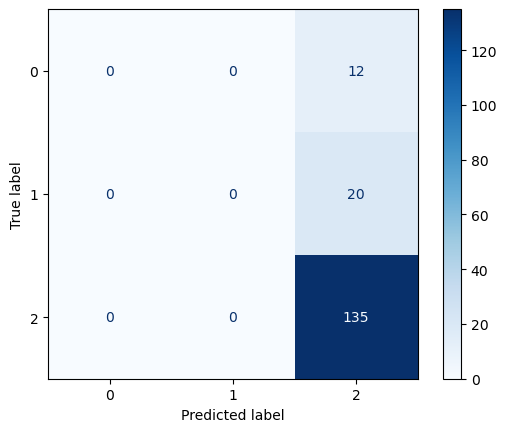

In [50]:
# Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Conclusiones:**
- La exactitud del modelo en la validación cruzada es constante en 0.82 para todos los valores de C probados. Esto sugiere que el modelo SVM con kernel lineal es bastante robusto y no es sensible a cambios en el parámetro C dentro del rango probado.
- Aunque C=1 fue seleccionado como el "mejor" valor, cualquier valor de C en el rango probado sería igualmente válido dado que todos proporcionaron la misma exactitud. 

- Con respecto a las métricas obtenidas:

    - Precisión: 0.65 (Precisión ponderada)
    - Exhaustividad (Recall): 0.81 (Recall ponderado)
    - Exactitud: 0.81

Estas métricas indican que el modelo es capaz de predecir correctamente el 81% de las muestras en el conjunto de test.
La precisión ponderada es de 0.65, lo que sugiere que, aunque el modelo tiene una buena exactitud general, puede haber un desequilibrio en cómo predice las diferentes clases.
La exhaustividad (recall) ponderada de 0.81 indica que el modelo recupera el 81% de las muestras de cada clase en promedio.
- El modelo SVM con kernel muestra un rendimiento estable en términos de exactitud para diferentes valores de C. Sin embargo, la precisión es relativamente baja comparada con la exactitud y el recall, lo que sugiere que podría haber margen para mejorar el balanceo entre las clases predichas. Probar diferentes configuraciones de modelos y ajustar los parámetros

Vamos a intentar realizar de nuevo la validación cruzada, pero ahora usando otras métricas, ya que vimos que la exactitud se mantiene constaten para distintos valores de C.

In [51]:
C_values = [0.1, 1, 10, 100, 1000]
cv_results = {}

# Métricas
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted')
}

# Realizamos validación cruzada para cada valor de C
for C in C_values:
    modelo = SVC(C=C, kernel='linear', random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_validate(modelo, X, y, cv=cv, scoring=scoring)
    
    # Promediamos los resultados de las métricas
    mean_scores = {metric: scores[f'test_{metric}'].mean() for metric in scoring}
    cv_results[C] = mean_scores
    print(f"C: {C}, Exactitud: {mean_scores['accuracy']:.2f}, Precisión: {mean_scores['precision']:.2f}, Exhaustividad: {mean_scores['recall']:.2f}")

# Seleccionamos el mejor modelo según la exactitud promedio
best_C = max(cv_results, key=lambda c: cv_results[c]['accuracy'])
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print(f"Mejor valor de C: {best_C}")

# Entrenamos el modelo final con el mejor valor de C
best_model = SVC(C=best_C, kernel='linear', random_state=42)
best_model.fit(X_train, y_train)

# Realizamos predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Evaluamos el mejor modelo en el conjunto de test
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Mejor Precisión: {precision_best:.2f}")
print(f"Mejor Exhaustividad: {recall_best:.2f}")
print(f"Mejor Exactitud: {accuracy_best:.2f}")


C: 0.1, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 1, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 10, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 100, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 1000, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
----------------------------------------
Mejores hiperparámetros encontrados (cv)
Mejor valor de C: 0.1
Mejor Precisión: 0.65
Mejor Exhaustividad: 0.81
Mejor Exactitud: 0.81


Vemos que en este caso tampoco hay cambios en los valores de las métricas.

Ademas podemos observar que nuestro modelo solo predice clase 2 (matriz de confusión), veamos si esto mejora al realizar SVM con otro kernel.

# 3) SVM con kernel gaussiano

Realizar la predicción del atributo Color utilizando máquinas de vectores con kernel gaussiano analizando los parámetros costo y gama. Mostar los resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando validación cruzada con k =5.

In [52]:
C_values = [0.1, 1, 10, 100]
gamma_values = [0.1, 1, 10]

# Definimos las métricas que deseamos calcular
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted')
}

# Realizamos validación cruzada para cada combinación de C y gamma
cv_results = {}
for C in C_values:
    for gamma in gamma_values:
        modelo = SVC(C=C, kernel='rbf', gamma=gamma, random_state=42)
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_validate(modelo, X_train, y_train, cv=cv, scoring=scoring)
        
        # Promediar los resultados de las métricas
        mean_scores = {metric: scores[f'test_{metric}'].mean() for metric in scoring}
        cv_results[(C, gamma)] = mean_scores
        print(f"C: {C}, Gamma: {gamma}, Exactitud: {mean_scores['accuracy']:.2f}, Precisión: {mean_scores['precision']:.2f}, Exhaustividad: {mean_scores['recall']:.2f}")

# Seleccionamos el mejor modelo según la exactitud promedio
best_params = max(cv_results, key=lambda x: cv_results[x]['accuracy'])
best_C, best_gamma = best_params
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print(f"Mejor valor de C: {best_C}, Mejor valor de gamma: {best_gamma}")

# Entrenamos el modelo final con los mejores parámetros
best_model = SVC(C=best_C, kernel='rbf', gamma=best_gamma, random_state=42)
best_model.fit(X_train, y_train)

# Realizamos predicciones con el mejor modelo en el conjunto de test
y_pred_best = best_model.predict(X_test)

# Evaluamos el mejor modelo en el conjunto de test
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Mejor Precisión: {precision_best:.2f}")
print(f"Mejor Exhaustividad: {recall_best:.2f}")
print(f"Mejor Exactitud: {accuracy_best:.2f}")


C: 0.1, Gamma: 0.1, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 0.1, Gamma: 1, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 0.1, Gamma: 10, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 1, Gamma: 0.1, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 1, Gamma: 1, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 1, Gamma: 10, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 10, Gamma: 0.1, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 10, Gamma: 1, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 10, Gamma: 10, Exactitud: 0.80, Precisión: 0.69, Exhaustividad: 0.80
C: 100, Gamma: 0.1, Exactitud: 0.82, Precisión: 0.67, Exhaustividad: 0.82
C: 100, Gamma: 1, Exactitud: 0.81, Precisión: 0.68, Exhaustividad: 0.81
C: 100, Gamma: 10, Exactitud: 0.73, Precisión: 0.69, Exhaustividad: 0.73
----------------------------------------
Mejores hiperparámetros encontrados (cv)
Mejor valor de C: 0.1, Mejor valor de gamma: 0.1
Me

Como obtuvimos una exactitud del 0.82 podemos decir que el modelo predijo correctamente el color del café el 82% de las veces durante la validación cruzada.
Por otro lado, una precisión de 0.67 significa que, de todas las muestras que el modelo predijo como de un color particular, el 67% eran correctas.

Los mejores hiperparámetros encontrados son C: 0.1 y Gamma: 0.1, con una exactitud promedio de 0.82 en la validación cruzada. Pero podemos observar que las métricas no sufren grandes cambios en su valor en las disitntas combinaciones de paramétros.

In [53]:
y_pred_best

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

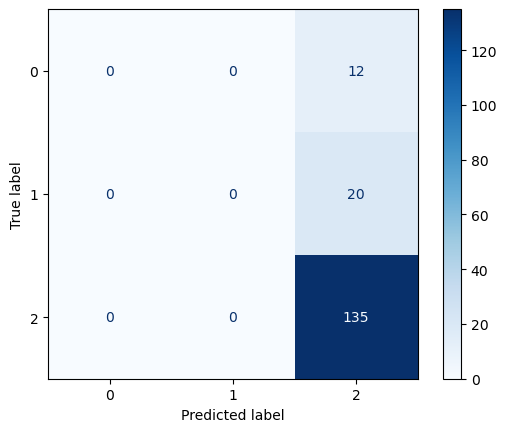

In [54]:
# Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Al igual que en el algorimo anterior, solo predecimos la clase 2, que corresponde al color verde.

# 4) Predicción del atributo Color utilizando Random Forest

Realizar la predicción del atributo Color utilizando Random Forest analizando los parámetros cantidad de estimadores y la máxima profundidad de los árboles. Mostar los
resultados sobre los conjuntos de test (Precisión, Exhaustividad y Exactitud) utilizando
validación cruzada con k =5.

In [55]:
# Creamos el clasificador Random Forest
# Como las clases estan desbalanceadas le ponemos como atributo class_weight='balanced'
modelo_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Definimos los valores de hiperparámetros que deseas probar
estimators = [50, 100, 150, 200,]  # Cantidad de estimadores
max_depths = [None, 5, 10, 15]  # Profundidades máximas de los árboles

# Realizamos la búsqueda de hiperparámetros utilizando validación cruzada
best_score = -1
best_estimators = None
best_max_depth = None

for n_estimators in estimators:
    for max_depth in max_depths:
        # Configuramos el clasificador con los hiperparámetros actuales
        modelo_rf.set_params(n_estimators=n_estimators, max_depth=max_depth)
        
        # Realizamos validación cruzada
        scores = cross_val_score(modelo_rf, X, y, cv=5, scoring='accuracy')  # Puedes usar otras métricas
        
        # Calculamos la precisión promedio de la validación cruzada
        mean_score = scores.mean()
        
        # Guardamos el mejor modelo hasta ahora
        if mean_score > best_score:
            best_score = mean_score
            best_estimators = n_estimators
            best_max_depth = max_depth

# Entrenamos el modelo final con los mejores hiperparámetros encontrados
modelo_rf_final = RandomForestClassifier(n_estimators=best_estimators, max_depth=best_max_depth, random_state=42)
modelo_rf_final.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de test
y_pred = modelo_rf_final.predict(X_test)

# Calculamos métricas de evaluación
# Como las clases estan desbalanceadas usamos como atributo 
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print("Mejores hiperparámetros encontrados:")
print("Cantidad de estimadores:", best_estimators)
print("Profundidad máxima de los árboles:", best_max_depth)
print("----------------------------------------")
print("\nResultados sobre el conjunto de test:")
print("Precisión:", round(precision, 4))
print("Exhaustividad:", round(recall, 4))
print("Exactitud:", round(accuracy, 4))


Mejores hiperparámetros encontrados:
Cantidad de estimadores: 200
Profundidad máxima de los árboles: None
----------------------------------------

Resultados sobre el conjunto de test:
Precisión: 0.6516
Exhaustividad: 0.7964
Exactitud: 0.7964


In [56]:
# Generamos el reporte de clasificación
class_report = classification_report(y_test, y_pred, target_names=['Bluish-Green', 'Blue-Green', 'Green'])

print("Reporte de Clasificación:")
print(class_report)

Reporte de Clasificación:
              precision    recall  f1-score   support

Bluish-Green       0.00      0.00      0.00        12
  Blue-Green       0.00      0.00      0.00        20
       Green       0.81      0.99      0.89       135

    accuracy                           0.80       167
   macro avg       0.27      0.33      0.30       167
weighted avg       0.65      0.80      0.72       167



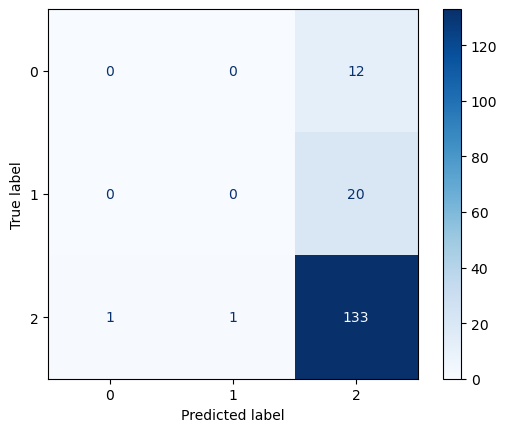

In [57]:
# Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

A partir del reporte obtenido podemos observar, una vez más, que el modelo no predice ninguna instancia de la clase Bluish-Green y Blue-Green
Con respecto a la clase Green podemos concluir que el 81% de las predicciones de la clase Green son correctas que el modelo identifica correctamente el 99% de las instancias de la clase Green. Y como el F1-Score es de 0.89, esto nos dice que la combinación de precisión y exhaustividad es muy buena.

Primero corrimos el algoritmo de Random Forest sin el paramétro class_weight='balanced' y al incluirlos los resultados fueron muy similares y tampoco logramos predecir las otras clases.

**Conclusiones sonbre los tres modelos:**

Podemos observar, en los tres casos, que al tener desbalance de clases el modelo está muy sesgado hacia la clase Green, ignorando completamente las clases Bluish-Green y Blue-Green. 

Las métricas obtenidas en todos los casos son buenas, pero esto se debe a que los modelos solo predicen la clase mayoritaria.


# Balanceo de los datos

En primer lugar corrimos los algoritmos sin balancear las clases y observamos con los algoritmos siempre predecian la clase 2, que es el color verde. Por lo cual a continuación vamos a balancear las clases y ver que resultados obtenemos en este caso.

In [58]:
conteo_colores = df['Color'].value_counts()
print(conteo_colores)

Color
2    681
1     96
0     58
Name: count, dtype: int64


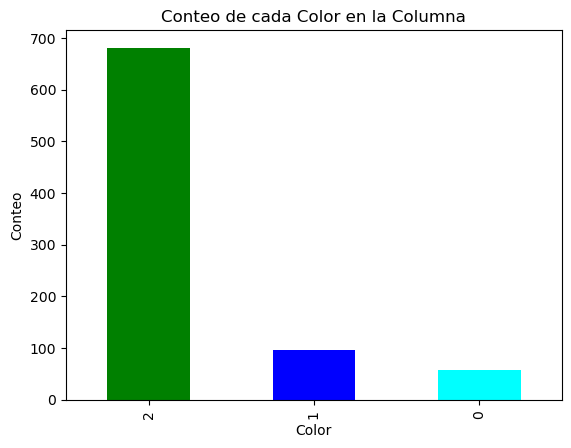

In [59]:
# Graficamos la freceuncua de cada color
conteo_colores.plot(kind='bar', color=['green', 'blue', 'cyan'])
plt.xlabel('Color')
plt.ylabel('Conteo')
plt.title('Conteo de cada Color en la Columna')
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Balanceamos las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [62]:
# Verificamos la cantidad de datos en cada clase después de aplicar SMOTE
conteo_clases_balanceadas = pd.Series(y_resampled).value_counts()
print(conteo_clases_balanceadas)

Color
2    475
0    475
1    475
Name: count, dtype: int64


Podemos observer que ahora si estan balanceadas las clases.

A continuación vamos a voler a correr los tres algoritmo ya utilizados para ver si logramos en algun caso predecir otra clase que no sea sola la clase 'Green'.

## SVM con kernel lieal

In [63]:
C_values = [1, 10, 100, 1000, 5000]
cv_results = {}

# Validación cruzada para cada valor de C
for C in C_values:
    modelo = SVC(C=C, kernel='linear', random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(modelo, X_resampled, y_resampled, cv=cv, scoring='accuracy')
    cv_results[C] = scores.mean()
    print(f"C: {C}, Exactitud: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# Seleccionamos el mejor modelo según la validación cruzada
best_C = max(cv_results, key=cv_results.get)
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print(f"Mejor valor de C: {best_C}")

# Entrenamos el modelo final con el mejor valor de C
best_model = SVC(C=best_C, kernel='linear', random_state=42)
best_model.fit(X_resampled, y_resampled)

# Predicciones con el mejor modelo
y_pred_best_l = best_model.predict(X_test)

# Evaluamos el mejor modelo en el conjunto de test
precision_best_l = precision_score(y_test, y_pred_best, average='weighted')
recall_best_l = recall_score(y_test, y_pred_best, average='weighted')
accuracy_best_l = accuracy_score(y_test, y_pred_best)

print(f"Mejor Precisión: {precision_best_l:.2f}")
print(f"Mejor Exhaustividad: {recall_best_l:.2f}")
print(f"Mejor Exactitud: {accuracy_best_l:.2f}")

C: 1, Exactitud: 0.50 (+/- 0.06)
C: 10, Exactitud: 0.52 (+/- 0.02)
C: 100, Exactitud: 0.51 (+/- 0.02)
C: 1000, Exactitud: 0.51 (+/- 0.02)
C: 5000, Exactitud: 0.51 (+/- 0.02)
----------------------------------------
Mejores hiperparámetros encontrados (cv)
Mejor valor de C: 10


ValueError: Found input variables with inconsistent numbers of samples: [251, 167]

In [64]:
y_pred_best_l

array([2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1,
       2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1,
       2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0,
       1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 1,
       2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2,
       0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1,
       2, 2, 0, 1, 2, 0, 2, 2, 1])

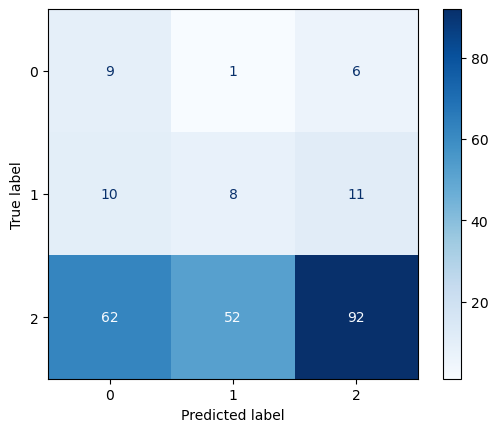

In [65]:
# Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred_best_l)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Podemos observar que ya no solo predicimos la clase Green, si no que todas.
El balanceo de clases reduce significativamente la exactitud global del modelo en la validación cruzada y en el conjunto de test.

Aunque la precisión mejora ligeramente, la exhaustividad y la exactitud disminuyen. Esto sugiere que, aunque el modelo se está esforzando más por equilibrar las clases, todavía no está logrando un buen desempeño global.

## SVM con kernel gaussiano

In [68]:
C_values = [0.1, 1, 10, 100]
gamma_values = [0.1, 1, 10]

# Definimos las métricas que deseamos calcular
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted')
}

# Realizamos validación cruzada para cada combinación de C y gamma
cv_results = {}
for C in C_values:
    for gamma in gamma_values:
        modelo = SVC(C=C, kernel='rbf', gamma=gamma, random_state=42)
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_validate(modelo, X_resampled, y_resampled, cv=cv, scoring=scoring)
        
        # Promediar los resultados de las métricas
        mean_scores = {metric: scores[f'test_{metric}'].mean() for metric in scoring}
        cv_results[(C, gamma)] = mean_scores
        print(f"C: {C}, Gamma: {gamma}, Exactitud: {mean_scores['accuracy']:.2f}, Precisión: {mean_scores['precision']:.2f}, Exhaustividad: {mean_scores['recall']:.2f}")

# Seleccionamos el mejor modelo según la exactitud promedio
best_params = max(cv_results, key=lambda x: cv_results[x]['accuracy'])
best_C, best_gamma = best_params
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print(f"Mejor valor de C: {best_C}, Mejor valor de gamma: {best_gamma}")

# Entrenamos el modelo final con los mejores parámetros
best_model = SVC(C=best_C, kernel='rbf', gamma=best_gamma, random_state=42)
best_model.fit(X_resampled, y_resampled)

# Realizamos predicciones con el mejor modelo en el conjunto de test
y_pred_best_g = best_model.predict(X_test)

# Evaluamos el mejor modelo en el conjunto de test
precision_best_g = precision_score(y_test, y_pred_best_g, average='weighted')
recall_best_g = recall_score(y_test, y_pred_best_g, average='weighted')
accuracy_best_g = accuracy_score(y_test, y_pred_best_g)

print(f"Mejor Precisión: {precision_best_g:.2f}")
print(f"Mejor Exhaustividad: {recall_best_g:.2f}")
print(f"Mejor Exactitud: {accuracy_best_g:.2f}")


C: 0.1, Gamma: 0.1, Exactitud: 0.48, Precisión: 0.50, Exhaustividad: 0.48
C: 0.1, Gamma: 1, Exactitud: 0.45, Precisión: 0.46, Exhaustividad: 0.45
C: 0.1, Gamma: 10, Exactitud: 0.57, Precisión: 0.58, Exhaustividad: 0.57
C: 1, Gamma: 0.1, Exactitud: 0.45, Precisión: 0.45, Exhaustividad: 0.45
C: 1, Gamma: 1, Exactitud: 0.55, Precisión: 0.55, Exhaustividad: 0.55
C: 1, Gamma: 10, Exactitud: 0.68, Precisión: 0.68, Exhaustividad: 0.68
C: 10, Gamma: 0.1, Exactitud: 0.52, Precisión: 0.52, Exhaustividad: 0.52
C: 10, Gamma: 1, Exactitud: 0.57, Precisión: 0.58, Exhaustividad: 0.57
C: 10, Gamma: 10, Exactitud: 0.78, Precisión: 0.80, Exhaustividad: 0.78
C: 100, Gamma: 0.1, Exactitud: 0.54, Precisión: 0.55, Exhaustividad: 0.54
C: 100, Gamma: 1, Exactitud: 0.66, Precisión: 0.66, Exhaustividad: 0.66
C: 100, Gamma: 10, Exactitud: 0.85, Precisión: 0.86, Exhaustividad: 0.85
----------------------------------------
Mejores hiperparámetros encontrados (cv)
Mejor valor de C: 100, Mejor valor de gamma: 10
Mej

In [69]:
y_pred_best_g

array([2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 1, 0, 1])

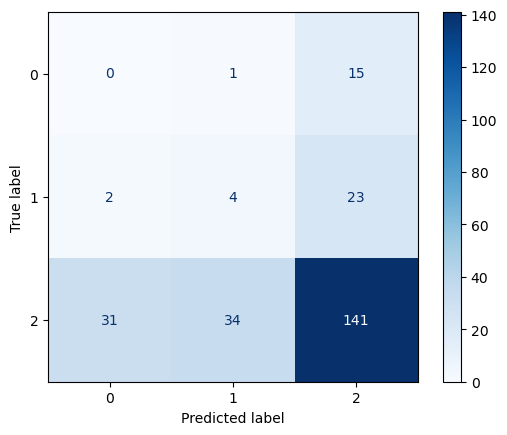

In [70]:
# Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred_best_g)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Predicción del atributo Color utilizando Random Forest

In [71]:
# Creamos el clasificador Random Forest
modelo_rf = RandomForestClassifier(random_state=42)

# Definimos los valores de hiperparámetros que deseas probar
estimators = [50, 100, 150, 200,]  # Cantidad de estimadores
max_depths = [None, 5, 10, 15]  # Profundidades máximas de los árboles

# Realizamos la búsqueda de hiperparámetros utilizando validación cruzada
best_score = -1
best_estimators = None
best_max_depth = None

for n_estimators in estimators:
    for max_depth in max_depths:
        # Configuramos el clasificador con los hiperparámetros actuales
        modelo_rf.set_params(n_estimators=n_estimators, max_depth=max_depth)
        
        # Realizamos validación cruzada
        scores = cross_val_score(modelo_rf, X, y, cv=5, scoring='accuracy')  # Puedes usar otras métricas
        
        # Calculamos la precisión promedio de la validación cruzada
        mean_score = scores.mean()
        
        # Guardamos el mejor modelo hasta ahora
        if mean_score > best_score:
            best_score = mean_score
            best_estimators = n_estimators
            best_max_depth = max_depth

# Entrenamos el modelo final con los mejores hiperparámetros encontrados
modelo_rf_final = RandomForestClassifier(n_estimators=best_estimators, max_depth=best_max_depth, random_state=42)
modelo_rf_final.fit(X_resampled, y_resampled)

# Realizamos predicciones en el conjunto de test
y_pred_best_rf = modelo_rf_final.predict(X_test)

# Calculamos métricas de evaluación
precision_rf = precision_score(y_test, y_pred_best_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_best_rf, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_best_rf)

print("Mejores hiperparámetros encontrados:")
print("Cantidad de estimadores:", best_estimators)
print("Profundidad máxima de los árboles:", best_max_depth)
print("----------------------------------------")
print("\nResultados sobre el conjunto de test:")
print("Precisión:", round(precision_rf, 4))
print("Exhaustividad:", round(recall_rf, 4))
print("Exactitud:", round(accuracy_rf, 4))


Mejores hiperparámetros encontrados:
Cantidad de estimadores: 100
Profundidad máxima de los árboles: 5
----------------------------------------

Resultados sobre el conjunto de test:
Precisión: 0.6966
Exhaustividad: 0.5936
Exactitud: 0.5936


In [113]:
y_pred_best_rf

array([2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1,
       2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 1])

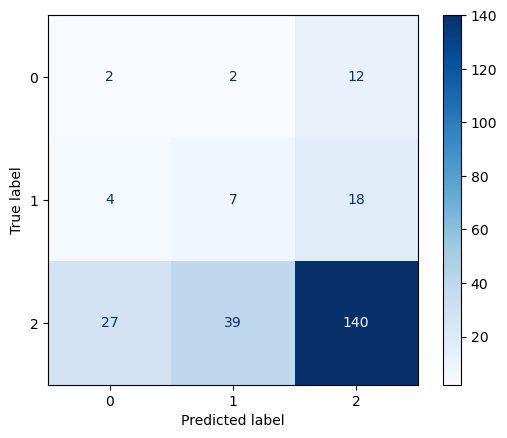

In [72]:
# Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Observamos que este algoritmo, al igual que los anteriores predice todas las clases y no solo la clase Green.
Por ejemolo en matriz de confusión podemos observar que 2 instancias de la clase 0 fueron clasificadas correctamente, mientras que 2 se clasificaron como clase 1 y 12 se casificaron como clase 12.

En la segunda fila vemos que 7 instancias de la clase 1 se clasificaron correctamente como clase 1, mientras que 4 se clasificaron incorrectamente como clase 0 y 18 como clase 2.

La clase 2 es la que mas clsificaciones correctas tiene.

## Conclusiones

In [114]:
data = {
    'Modelo': ['SVM (Lineal)', 'SVM (Gaussiano)', 'Random Forest'],
    'Precisión': [precision_best_l, precision_best_g, precision_rf],
    'Exhaustividad': [recall_best_l, recall_best_g, recall_rf],
    'Exactitud': [accuracy_best_l, accuracy_best_g, accuracy_rf]
}

# Convertir el diccionario en un DataFrame
df_comparativo = pd.DataFrame(data)

# Mostrar el DataFrame
print(df_comparativo)

# Opcional: Puedes guardar el DataFrame en un archivo CSV para futuras referencias
df_comparativo.to_csv('comparacion_modelos.csv', index=False)

            Modelo  Precisión  Exhaustividad  Exactitud
0     SVM (Lineal)   0.658337       0.577689   0.577689
1  SVM (Gaussiano)   0.658337       0.577689   0.577689
2    Random Forest   0.696597       0.593625   0.593625


SVM lineal y gaussiano tienen un precision, una exhaustividad y una accuracy muy similar, mientras que estos valores en el caso de Random Forest son ligeramente superiores.

Random Forest parece ser el mejor modelo entre los tres, con valores superiores en todas las métricas comparadas. Aunque la mejora no es muy grande.


Al analizar los resultados, observamos que las métricas de rendimiento empeoran cuando balanceamos las clases, en comparación con los resultados obtenidos sin balancear los datos. En el contexto del café, si no es problemático predecir únicamente la clase 'Green', podríamos optar por un modelo sin balancear los datos. Sin embargo, si es esencial predecir todas las clases de manera efectiva, es necesario balancear los datos primero.

En los algoritmos donde las clases están balanceadas, los resultados muestran que el modelo de Random Forest tiene un rendimiento ligeramente superior en comparación con los otros algoritmos.